In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib

import matplotlib 
matplotlib.rcParams.update({'font.size': 22})

import tddft_data.reference_methods
importlib.reload(tddft_data.reference_methods)

<module 'tddft_data.reference_methods' from '/Users/of15641/OneDrive - University of Bristol/Documents/Postgrad_folder/Year_2/chlorophyll_parameterization/tddft_data/reference_methods.py'>

### Bchla-xTB methods

In [2]:
D_scl_method = pd.read_pickle("dipole_mags/dipole_mags.pkl")
previous_method = pd.read_pickle("gfn1/gfn1_eigdiff_test_no_RMSE.pkl")
D_scl_method

,chromophores,set,tddft_energy,xtb_energy,energy_error,Z_values,tddft_dipoles,xtb_dipoles,dipole_errors,Na_Nc,tddft_angle_errors,xtb_angle_errors
0,step_1001_chromophore_1,test,1.912907,1.898920,-0.013987,-0.891145,"[-0.34950403, 2.653887491, -0.477898847]","[0.36169878382359116, -2.663533076023871, 0.12...",0.352388,"[-0.29400000000000004, 4.065999999999999, -0.3...",6.754632,3.919135
1,step_1001_chromophore_12,test,1.800987,1.804230,0.003243,0.202531,"[-2.287369813, -1.499455904, 0.193644764]","[2.3210436296213315, 1.4547704031717854, -0.04...",0.162745,"[3.653000000000006, 1.8580000000000005, -0.551...",7.226140,8.515070
2,step_1001_chromophore_13,test,1.945561,1.942465,-0.003096,-0.199847,"[-0.754756204, -2.53537159, -0.019176462]","[0.7942018025755319, 2.554650398302077, -0.270...",0.293368,"[-1.131999999999998, -3.8919999999999995, -0.3...",4.212450,10.447244
3,step_1001_chromophore_15,test,1.872008,1.890991,0.018983,1.201564,"[-0.54968506, -2.608078035, -0.050338471]","[-0.5191698525715183, -2.6245531989082855, -0....",0.166883,"[1.036999999999999, 4.018999999999998, -0.1140...",3.692699,6.957156
4,step_1001_chromophore_16,test,1.826320,1.817899,-0.008421,-0.537836,"[-0.947789088, 2.495867441, 0.332799887]","[-0.9780427503388807, 2.5676113808255963, -0.0...",0.393144,"[1.5859999999999985, -3.777000000000001, -0.36...",2.769908,6.545793
...,...,...,...,...,...,...,...,...,...,...,...,...
502,step_951_chromophore_21,test,1.853668,1.880141,0.026473,1.677002,"[-2.490853557, 1.063950918, -0.062505406]","[-2.4709362920185014, 1.0725943178557489, 0.12...",0.183988,"[-3.908999999999999, 1.4699999999999989, -0.50...",6.162496,9.922109
503,step_951_chromophore_23,test,1.826429,1.823362,-0.003067,-0.198003,"[-0.422365249, -2.610028365, 0.590992657]","[-0.7257791024569386, -2.5495286830965465, 0.7...",0.355195,"[0.2789999999999999, 4.154999999999994, -1.012...",5.319576,11.893541
504,step_951_chromophore_24,test,1.843708,1.833975,-0.009733,-0.621130,"[-2.783375996, 0.034964353, 0.263783579]","[2.6984126958655046, 0.017593618431285308, -0....",0.288293,"[-4.051, -0.08500000000000085, 0.4269999999999...",2.004818,5.246490
505,step_951_chromophore_3,test,1.857586,1.835276,-0.022310,-1.419430,"[-0.012588919, -2.812019863, -0.183832072]","[0.009821433074351807, 2.78491078237127, -0.11...",0.302418,"[-0.1549999999999998, -4.112, -0.4310000000000...",2.933543,8.616865


### Reference methods

In [3]:
PBE0_df = tddft_data.reference_methods.read_td_method("PBE0", root="tddft_data")
BLYP_df = tddft_data.reference_methods.read_td_method("BLYP", root="tddft_data")
CAMB3LYP_df = tddft_data.reference_methods.read_td_method("camb3lyp", root="tddft_data")
eig_df = tddft_data.reference_methods.read_excited_scf_method("eigdiff", root="tddft_data")
dscf_df = tddft_data.reference_methods.read_excited_scf_method("dscf", root="tddft_data")
dscf_df = dscf_df.loc[dscf_df["dscf excitation energy (eV)"] > 1.2]


In [7]:
dscf_df

,dscf excitation energy (hr),dscf excitation energy (eV),dscf transition dipole,dscf transition dipole magnitude,dscf angle to Na_Nc
chromophore,,,,,
step_1_chromophore_1,0.059516,1.619514,"[0.46401, -4.27518, 0.40811]",4.319609,1.758567
step_1_chromophore_2,0.061786,1.681278,"[-3.90424, 0.61879, -1.46521]",4.215784,3.110331
step_1_chromophore_3,0.061954,1.685850,"[0.14018, -4.31685, 0.06546]",4.319621,7.730638
step_1_chromophore_4,0.059589,1.621511,"[2.47946, -3.51776, -0.01642]",4.303792,6.260287
step_1_chromophore_5,0.060622,1.649614,"[-4.12535, -0.71197, -0.72267]",4.248254,2.921076
...,...,...,...,...,...
step_351_chromophore_11,0.058075,1.580315,"[-0.82919, 4.11031, 0.66891]",4.246133,0.569767
step_351_chromophore_12,0.062129,1.690619,"[-3.35841, -2.19644, 1.06785]",4.152538,3.042040
step_351_chromophore_13,0.058746,1.598549,"[1.33099, 4.10741, 0.20087]",4.322349,0.978833


In [4]:
eig_df

,eigdiff excitation energy (hr),eigdiff excitation energy (eV),eigdiff transition dipole,eigdiff transition dipole magnitude,eigdiff angle to Na_Nc
chromophore,,,,,
step_1_chromophore_1,0.075469,2.053618,"[0.47225, -4.3369, 0.41082]",4.381837,1.797009
step_1_chromophore_2,0.078715,2.141950,"[-3.92634, 0.73373, -1.51811]",4.273074,4.545111
step_1_chromophore_3,0.077284,2.103000,"[-0.16592, 4.34083, -0.2389]",4.350564,9.995884
step_1_chromophore_4,0.072902,1.983756,"[2.47465, -3.56443, -0.19996]",4.343851,8.700933
step_1_chromophore_5,0.077755,2.115830,"[-4.20841, -0.56143, -0.7958]",4.319631,5.169373
...,...,...,...,...,...
step_951_chromophore_23,0.073744,2.006685,"[-0.94468, -4.14074, 1.06974]",4.379782,8.757926
step_951_chromophore_24,0.075079,2.042998,"[-4.32104, 0.04654, 0.59667]",4.362289,2.582104
step_951_chromophore_25,0.072393,1.969926,"[-1.9122, -3.9246, 0.20649]",4.370541,8.560763


In [5]:
BLYP_w_ref = tddft_data.reference_methods.merge_multiple([BLYP_df, PBE0_df])
CAMB3LYP_w_ref = tddft_data.reference_methods.merge_multiple([CAMB3LYP_df, PBE0_df])
eig_w_ref = tddft_data.reference_methods.merge_multiple([eig_df, PBE0_df])
dscf_w_ref = tddft_data.reference_methods.merge_multiple([dscf_df, PBE0_df])

In [6]:
CAMB3LYP_w_ref

,PBE0 excitation energy (hr),PBE0 excitation energy (eV),PBE0 transition dipole,PBE0 transition dipole magnitude,PBE0 angle to Na_Nc,camb3lyp excitation energy (hr),camb3lyp excitation energy (eV),camb3lyp transition dipole,camb3lyp transition dipole magnitude,camb3lyp angle to Na_Nc
chromophore,,,,,,,,,,
step_1_chromophore_1,0.067717,1.842674,"[0.317897861, -2.809640878, 0.42749865]",2.859702,2.899759,0.061774,1.680957,"[-0.344246557, 2.986304549, -0.46262122]",3.041470,3.092448
step_1_chromophore_2,0.069685,1.896226,"[-2.524499202, 0.304943289, -0.930976293]",2.707915,1.298454,0.064174,1.746264,"[2.67300201, -0.307406901, 0.972574223]",2.861003,1.223773
step_1_chromophore_3,0.069472,1.890430,"[-0.108963652, 2.698992205, 0.009968239]",2.701209,6.916742,0.063609,1.730890,"[-0.123189566, 2.991368456, 0.025441938]",2.994012,6.693221
step_1_chromophore_4,0.066639,1.813340,"[1.617982036, -2.206127746, 0.104792943]",2.737854,3.923725,0.060867,1.656276,"[-1.813055117, 2.472120037, -0.124384089]",3.068227,3.796682
step_1_chromophore_5,0.068698,1.869369,"[-2.513608476, -0.533726385, -0.412970936]",2.602621,1.174773,0.063319,1.722999,"[-2.758037614, -0.604981519, -0.436811466]",2.857198,0.878651
...,...,...,...,...,...,...,...,...,...,...
step_851_chromophore_23,0.068872,1.874104,"[-0.868982421, -2.594389649, 0.530565507]",2.787021,5.035273,0.063464,1.726944,"[0.909752855, 2.763981312, -0.546435187]",2.960715,4.609729
step_851_chromophore_24,0.067558,1.838348,"[2.622754882, -0.14470537, 0.621146015]",2.699186,0.914996,0.061667,1.678045,"[2.898551339, -0.160722366, 0.716860945]",2.990204,0.751224
step_851_chromophore_25,0.069630,1.894730,"[1.187020873, 2.488998678, -0.353684747]",2.780149,2.500153,0.063687,1.733012,"[-1.302802711, -2.755071713, 0.399322969]",3.073626,2.607730


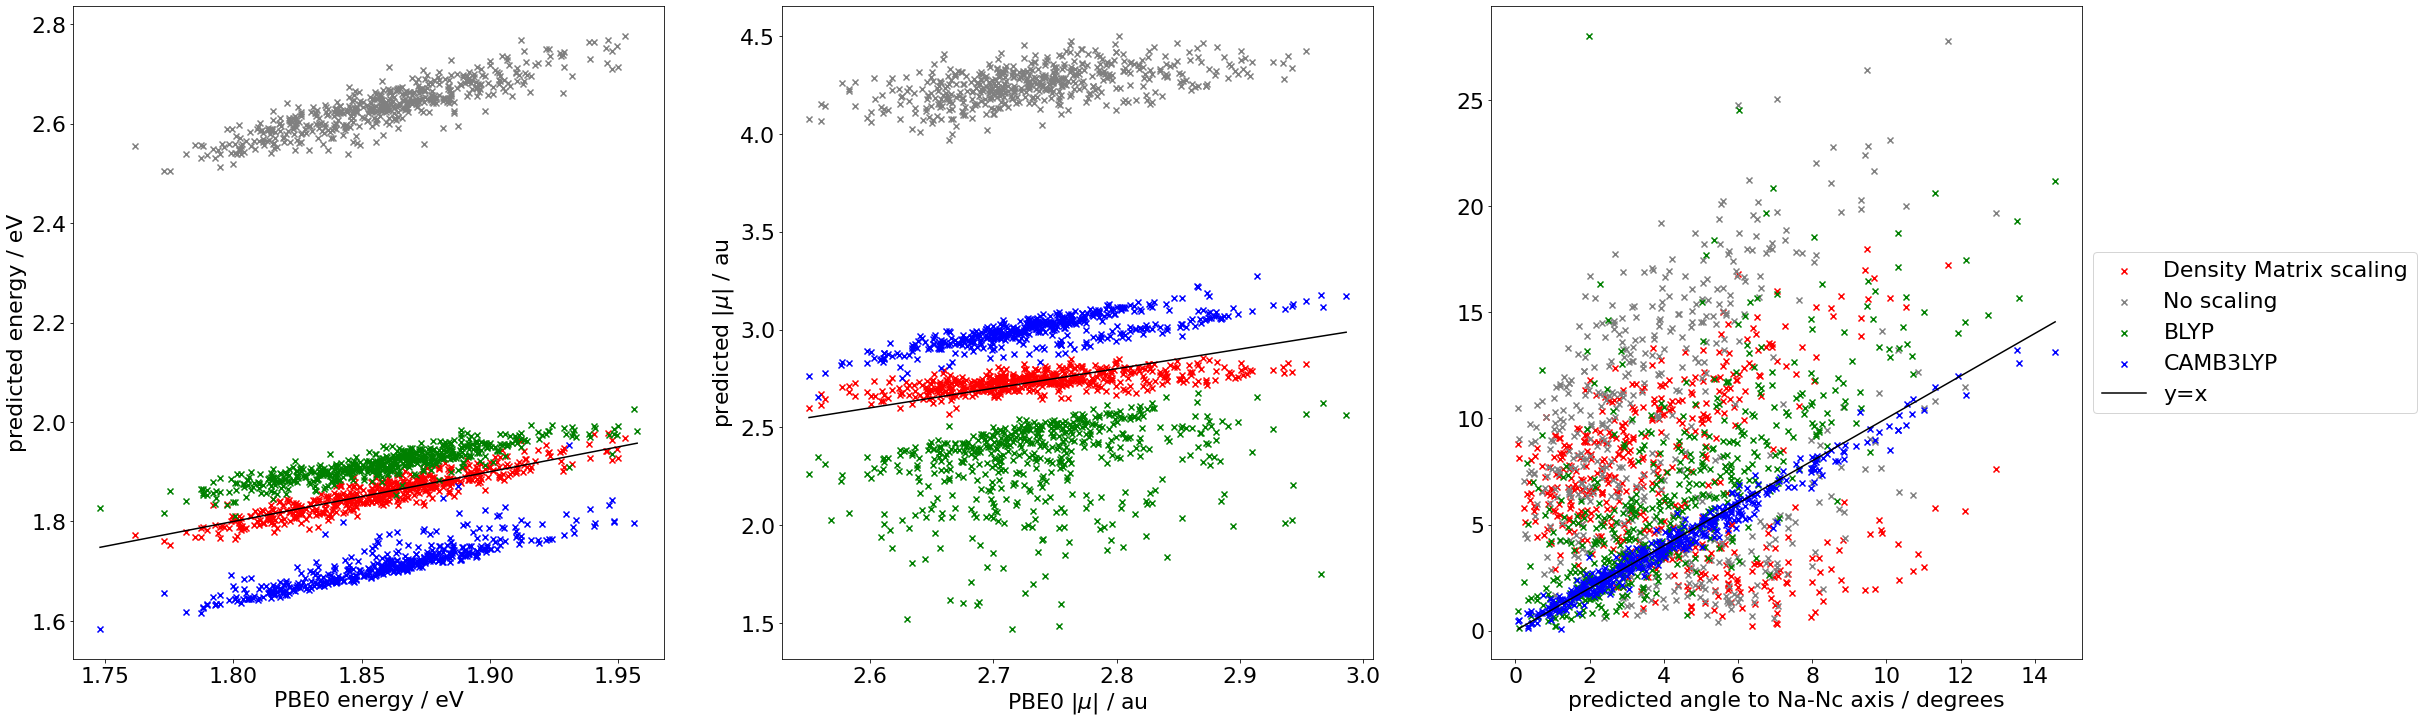

In [8]:
fig, ax = plt.subplots(1, 3) 

e_PBE0_vals = PBE0_df["PBE0 excitation energy (eV)"]
dip_PBE0_vals = PBE0_df["PBE0 transition dipole magnitude"]
ang_PBE0_vals = PBE0_df["PBE0 angle to Na_Nc"]

e_PBE0_max = max(e_PBE0_vals)
e_PBE0_min = min(e_PBE0_vals)
dip_PBE0_max = max(dip_PBE0_vals)
dip_PBE0_min = min(dip_PBE0_vals)
ang_PBE0_max = max(ang_PBE0_vals)
ang_PBE0_min = min(ang_PBE0_vals)

e_D_scl = ax[0].scatter(D_scl_method["tddft_energy"].to_numpy(), D_scl_method["xtb_energy"].to_numpy(), color='red', marker='x')
e_previous = ax[0].scatter(previous_method["tddft_energy"].to_numpy(), previous_method["xtb_energy"].to_numpy(), color='grey', marker='x')
e_BLYP = ax[0].scatter(BLYP_w_ref["PBE0 excitation energy (eV)"].to_numpy(), BLYP_w_ref["BLYP excitation energy (eV)"].to_numpy(), color='green', marker='x')
e_CAMB3LYP = ax[0].scatter(CAMB3LYP_w_ref["PBE0 excitation energy (eV)"].to_numpy(), CAMB3LYP_w_ref["camb3lyp excitation energy (eV)"].to_numpy(), color='blue', marker='x')

dip_D_scl = ax[1].scatter([np.linalg.norm(x) for x in D_scl_method["tddft_dipoles"]], [np.linalg.norm(x) for x in D_scl_method["xtb_dipoles"]], color='red', marker='x')
dip_previous = ax[1].scatter([np.linalg.norm(x) for x in previous_method["tddft_dipoles"]], [np.linalg.norm(x) for x in previous_method["xtb_dipoles"]], color='grey', marker='x')
dip_BLYP = ax[1].scatter(BLYP_w_ref["PBE0 transition dipole magnitude"].to_numpy(), BLYP_w_ref["BLYP transition dipole magnitude"].to_numpy(), color='green', marker='x')
dip_CAMB3LYP = ax[1].scatter(CAMB3LYP_w_ref["PBE0 transition dipole magnitude"].to_numpy(), CAMB3LYP_w_ref["camb3lyp transition dipole magnitude"].to_numpy(), color='blue', marker='x')

ang_D_scl = ax[2].scatter(D_scl_method["tddft_angle_errors"].to_numpy(), D_scl_method["xtb_angle_errors"].to_numpy(), color='red', marker='x')
ang_previous = ax[2].scatter(previous_method["tddft_angle_errors"].to_numpy(), previous_method["xtb_angle_errors"].to_numpy(), color='grey', marker='x')
ang_BLYP = ax[2].scatter(BLYP_w_ref["PBE0 angle to Na_Nc"].to_numpy(), BLYP_w_ref["BLYP angle to Na_Nc"].to_numpy(), color='green', marker='x')
ang_CAMB3LYP = ax[2].scatter(CAMB3LYP_w_ref["PBE0 angle to Na_Nc"].to_numpy(), CAMB3LYP_w_ref["camb3lyp angle to Na_Nc"].to_numpy(), color='blue', marker='x')

y_x, = ax[0].plot([e_PBE0_min, e_PBE0_max], [e_PBE0_min, e_PBE0_max], color='black')
ax[1].plot([dip_PBE0_min, dip_PBE0_max], [dip_PBE0_min, dip_PBE0_max], color='black')
ax[2].plot([ang_PBE0_min, ang_PBE0_max], [ang_PBE0_min, ang_PBE0_max], color='black')

ax[0].set_xlabel("PBE0 energy / eV")
ax[0].set_ylabel("predicted energy / eV")

ax[1].set_xlabel("PBE0 $|\mu|$ / au")
ax[1].set_ylabel("predicted $|\mu|$ / au")

ax[2].set_xlabel("PBE0 angle to Na-Nc axis / degrees")
ax[2].set_xlabel("predicted angle to Na-Nc axis / degrees")

ax[2].legend((e_D_scl, e_previous, e_BLYP, e_CAMB3LYP, y_x), ("Density Matrix scaling", "No scaling", "BLYP", "CAMB3LYP", "y=x"), bbox_to_anchor=(1, 0.5), loc='center left')

fig.set_size_inches(36,12)

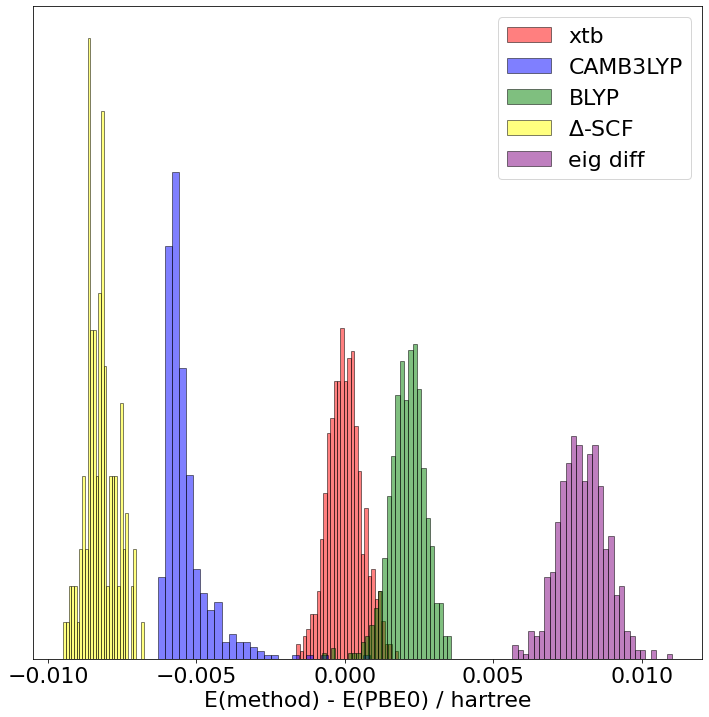

In [10]:
fig, ax = plt.subplots()

camb3lyp_error = (CAMB3LYP_w_ref["camb3lyp excitation energy (eV)"].to_numpy() - CAMB3LYP_w_ref["PBE0 excitation energy (eV)"].to_numpy())/27.2114
BLYP_error = (BLYP_w_ref["BLYP excitation energy (eV)"].to_numpy() - BLYP_w_ref["PBE0 excitation energy (eV)"].to_numpy())/27.2114
dscf_error = (dscf_w_ref["dscf excitation energy (eV)"].to_numpy() - dscf_w_ref["PBE0 excitation energy (eV)"].to_numpy())/27.2114
eigdiff_error = (eig_w_ref["eigdiff excitation energy (eV)"].to_numpy() - eig_w_ref["PBE0 excitation energy (eV)"].to_numpy())/27.2114

bins = 30

ax.hist(D_scl_method["energy_error"]/27.2114, density=True, bins=bins, alpha=0.5, edgecolor='black', label='xtb', color='red')
ax.hist(camb3lyp_error, density=True, bins=bins, alpha=0.5, edgecolor='black', label='CAMB3LYP', color='blue')
ax.hist(BLYP_error, density=True, bins=bins, alpha=0.5, edgecolor='black', label='BLYP', color='green')
ax.hist(dscf_error, density=True, bins=bins, alpha=0.5, edgecolor='black', label='$\Delta$-SCF', color='yellow')
ax.hist(eigdiff_error, density=True, bins=bins, alpha=0.5, edgecolor='black', label='eig diff', color='purple')

ax.set_yticks([])

ax.set_xlabel("E(method) - E(PBE0) / hartree")
ax.legend()

fig.set_size_inches(12, 12)